In [1]:
import pandas as pd

twitter202002 = pd.read_csv("tweet_activity_metrics_light940_20200201_20200301_ja.csv", sep=",")
twitter202003 = pd.read_csv("tweet_activity_metrics_light940_20200301_20200323_ja.csv", sep=",")
twitter_all = pd.concat([twitter202002, twitter202003])
# 必要なデータだけピックアップ
twitter_all_simple = twitter_all[['ツイートID', 
                                  'ツイート本文', 
                                  '時間', 
                                  'インプレッション', 
                                  'エンゲージメント',
                                  'エンゲージメント率',
                                  'リツイート',
                                  '返信',
                                  'いいね']]
# twitter_all_simple
# twitter_all_simple.sort_values('いいね', ascending=False)

In [3]:
import datetime

# 時間を3つに分類
def cast_date(x):
    datetime_utc = datetime.datetime.strptime(x, "%Y-%m-%d %H:%M %z")
    datetime_jst = datetime_utc.astimezone(datetime.timezone(datetime.timedelta(hours=+9)))
    hour = datetime_jst.hour
#     hour = int(str(x)[11:13])
    if hour >= 6 and hour < 12:
        return '朝'
    elif hour >= 12 and hour < 18:
        return '昼'
    elif (hour >= 18 and hour <= 24) or (hour >= 0 and hour < 6):
        return '夜'

# 時間を切り取る
def cut_hour(x):
    datetime_utc = datetime.datetime.strptime(x, "%Y-%m-%d %H:%M %z")
    datetime_jst = datetime_utc.astimezone(datetime.timezone(datetime.timedelta(hours=+9)))
    return datetime_jst.hour

twitter_all_add_date = twitter_all_simple.copy()
twitter_all_add_date['朝昼夜'] = twitter_all_simple['時間'].apply(lambda x : cast_date(x))
twitter_all_add_date['時'] = twitter_all_simple['時間'].apply(lambda x : cut_hour(x))

# twitterAllSimple['いいね'].apply(lambda x : x*20)
# twitterAllSimple = twitterAllSimple.apply(lambda x : x['いいね']*20, axis=1)
# twitterAllSimple.dtypes
# twitter_all_add_date
# twitterAllSimple

In [5]:
# twitter_all_add_date.groupby('時').mean()
# twitter_all_add_date.groupby('時').sum()
# twitter_all_add_date.groupby('時').count()

# twitter_all_add_date.groupby('朝昼夜').size()
# twitter_all_add_date.groupby('朝昼夜').size().keys
# twitter_all_add_date.groupby('朝昼夜').size().values
twitter_all_add_date.groupby('朝昼夜').describe()

ツイートID                                                          \
     count          mean           std           min           25%   
朝昼夜                                                                  
夜    109.0  1.234505e+18  4.881470e+15  1.223957e+18  1.230799e+18   
昼     20.0  1.235069e+18  4.167629e+15  1.227088e+18  1.231727e+18   
朝     41.0  1.232674e+18  5.788753e+15  1.223782e+18  1.228073e+18   

                                              インプレッション              ...  いいね  \
              50%           75%           max    count        mean  ...  75%   
朝昼夜                                                                 ...        
夜    1.235531e+18  1.238471e+18  1.241671e+18    109.0  846.366972  ...  1.0   
昼    1.234711e+18  1.238137e+18  1.241626e+18     20.0  808.800000  ...  2.0   
朝    1.231352e+18  1.238986e+18  1.241532e+18     41.0  462.878049  ...  2.0   

               時                                                       
      max  count       mean       std   min    25%   50%    75%   max  
朝昼夜                                                                    
夜    27.0  109.0  20.311927  2.470932   0.0  19.00  20.0  22.00  23.0  
昼     9.0   20.0  13.550000  1.503505  12.0  12.75  13.0  14.25  17.0  
朝    13.0   41.0   8.365854  1.512549   6.0   7.00   9.0   9.00  11.0  

[3 rows x 64 columns]

* [matplotlib でヒストグラムを描く](https://pythondatascience.plavox.info/matplotlib/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0)
* [matplotlibのレイアウト調節](https://qiita.com/aurueps/items/d04a3bb127e2d6e6c21b)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  3., 11.,  6.,  4.,  5.,
         8.,  2.,  2.,  2.,  1.,  9., 21., 30., 18., 15., 15.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
        21.5, 22.5, 23.5]),
 <a list of 24 Patch objects>)

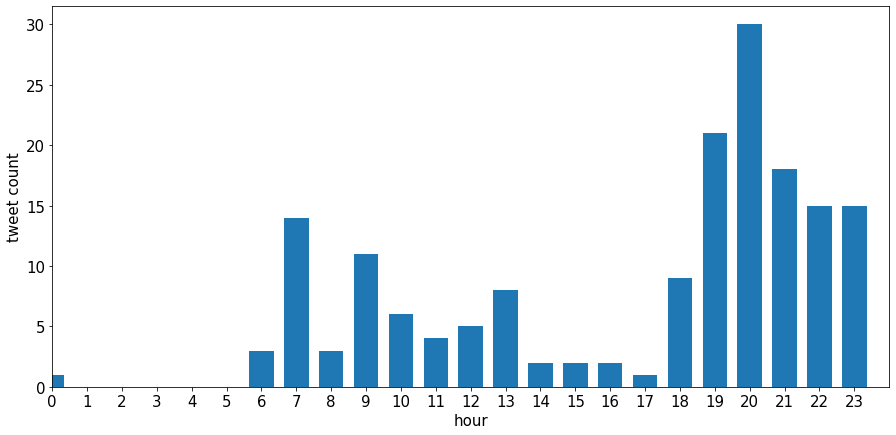

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# fig, ax = plt.subplots(facecolor="w")
# ax.plot(x, y)

x = twitter_all_add_date['時'].values
# x = twitter_all_add_date.groupby('時').count()

plt.xlim(0, 24) # (1) x軸の表示範囲
plt.xticks(range(24))
plt.rcParams["figure.figsize"] = [15,7] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["font.size"] = 15 # フォントサイズ デフォルト12
plt.xlabel("hour")
plt.ylabel("tweet count")
plt.hist(x, rwidth=0.7, bins=np.arange(-1, 24)+0.5)
# plt.hist(x, rwidth=0.7, bins=24)


<BarContainer object of 3 artists>

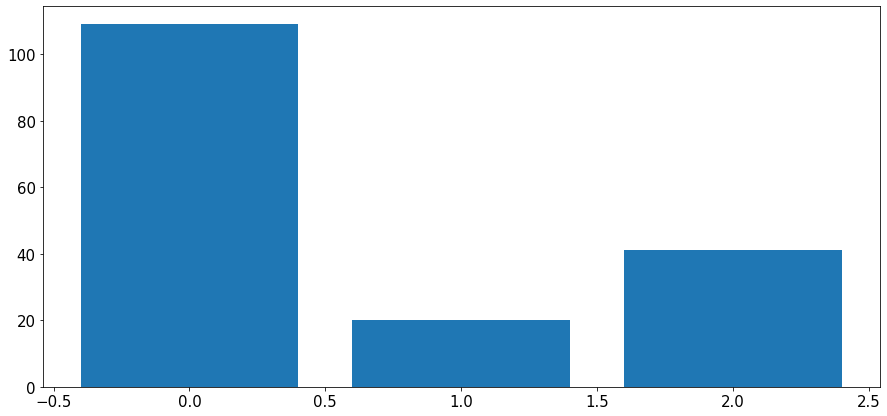

In [11]:
date_data = twitter_all_add_date.groupby('朝昼夜').size()
plt.bar(np.arange(len(date_data)), date_data.values)

In [12]:
from scipy import stats

# いいね数
# morning = twitter_all_add_date.query("朝昼夜 == '朝'")['いいね']
# noon = twitter_all_add_date.query("朝昼夜 == '昼'")['いいね']
# evening = twitter_all_add_date.query("朝昼夜 == '夜'")['いいね']
# インプレッション
morning = twitter_all_add_date.query("朝昼夜 == '朝'")['インプレッション']
noon = twitter_all_add_date.query("朝昼夜 == '昼'")['インプレッション']
evening = twitter_all_add_date.query("朝昼夜 == '夜'")['インプレッション']

print('朝平均：', np.mean(morning))
print('昼平均：', np.mean(noon))
print('夜平均：', np.mean(evening))

# 朝昼夜で有意差があるものを判定
print('朝と昼のウェルチのt検定:', stats.ttest_ind(morning, noon, equal_var=False))
print('朝と夜のウェルチのt検定:', stats.ttest_ind(morning, evening, equal_var=False))
print('昼と夜のウェルチのt検定:', stats.ttest_ind(noon, evening, equal_var=False))

print('朝と昼のウィルコクソンの順位和検定:', stats.mannwhitneyu(morning, noon, alternative='two-sided'))
print('朝と夜のウィルコクソンの順位和検定:', stats.mannwhitneyu(morning, evening, alternative='two-sided'))
print('昼と夜のウィルコクソンの順位和検定:', stats.mannwhitneyu(noon, evening, alternative='two-sided'))

朝平均： 462.8780487804878
昼平均： 808.8
夜平均： 846.3669724770642
朝と昼のウェルチのt検定: Ttest_indResult(statistic=-0.7154192032200898, pvalue=0.4806635237757064)
朝と夜のウェルチのt検定: Ttest_indResult(statistic=-1.0055021932704624, pvalue=0.31629927090203513)
昼と夜のウェルチのt検定: Ttest_indResult(statistic=-0.0678885662340645, pvalue=0.9461858137828276)
朝と昼のウィルコクソンの順位和検定: MannwhitneyuResult(statistic=381.0, pvalue=0.6614560677439112)
朝と夜のウィルコクソンの順位和検定: MannwhitneyuResult(statistic=2482.5, pvalue=0.29658731725750187)
昼と夜のウィルコクソンの順位和検定: MannwhitneyuResult(statistic=1343.5, pvalue=0.0996727984464099)


In [506]:
# 有意差がありそうな変数の具体的な値を見てみる
# twitter_all_add_date.query("朝昼夜 == '朝'").sort_values('いいね', ascending=False)
# twitter_all_add_date.query("朝昼夜 == '朝'").sort_values('インプレッション', ascending=False)
# twitter_all_add_date.query("朝昼夜 == '夜'").sort_values('いいね', ascending=False)
# twitter_all_add_date.query("朝昼夜 == '夜'").sort_values('インプレッション', ascending=False)

In [13]:
# インプレッションといいねの相関

# 外れ値削除
twitter_all_simple_shaping = twitter_all_simple[twitter_all_simple['ツイートID'] != 1238040860505202689]

impression = twitter_all_simple_shaping[['インプレッション']]
good = twitter_all_simple_shaping[['いいね']]
# impression.sort_values('インプレッション', ascending=False)

# twitter_all_simple_shaping.sort_values('インプレッション', ascending=False)

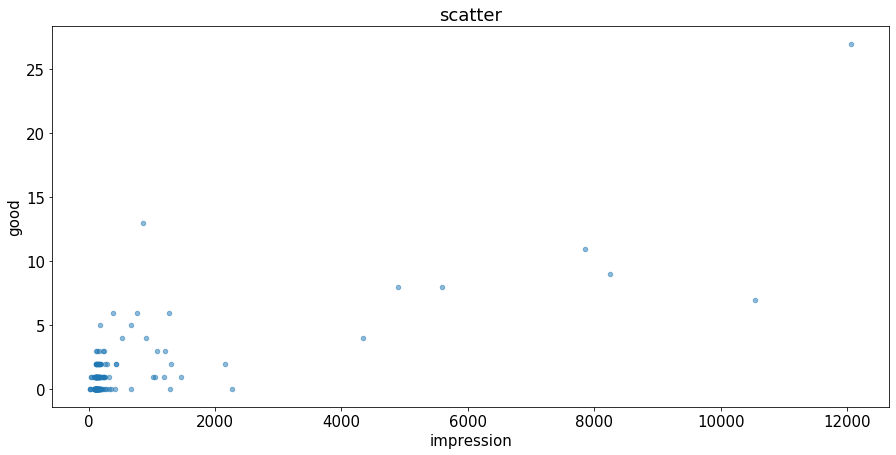

In [14]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15,7] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["font.size"] = 15 # フォントサイズ デフォルト12
plt.title("scatter")
plt.xlabel("impression")
plt.ylabel("good")
plt.scatter(impression, good, s=20, alpha=0.5)

In [15]:
# statsmodelsを使った回帰分析
import statsmodels.api as sm
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(impression.values, good.values)

sm_model = sm.OLS(good, sm.add_constant(impression))
result = sm_model.fit(disp=0)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    いいね   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     260.2
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           6.78e-36
Time:                        23:26:47   Log-Likelihood:                -336.36
No. Observations:                 169   AIC:                             676.7
Df Residuals:                     167   BIC:                             683.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5972      0.145      4.113      0.0

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


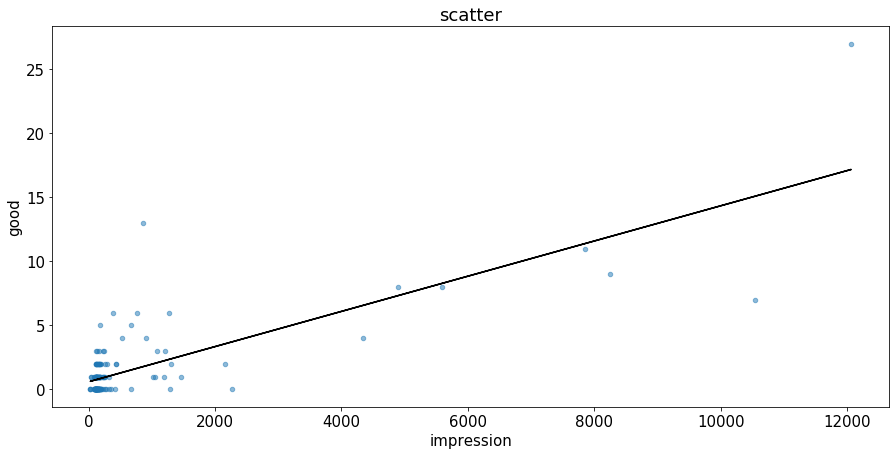

In [16]:
# 回帰直線
plt.rcParams["figure.figsize"] = [15,7] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["font.size"] = 15 # フォントサイズ デフォルト12
plt.title("scatter")
plt.xlabel("impression")
plt.ylabel("good")
plt.scatter(impression, good, s=20, alpha=0.5)
plt.plot(impression.values, model.predict(impression.values), color='black')